In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import jarque_bera
import scipy.stats as stats
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('regression_data.csv')
df.head()

,x,y,z,cat,y2,x2,d1,zx
0,22,10,19,a,100,484,0,418
1,1,7,70,a,49,1,0,70
2,21,22,4,a,484,441,0,84
3,23,7,23,b,49,529,0,529
4,10,12,56,b,144,100,0,560


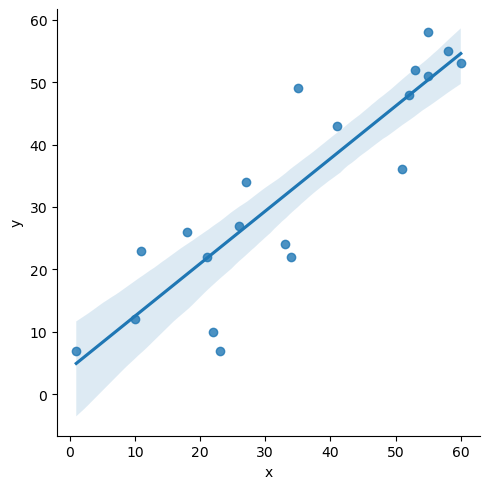

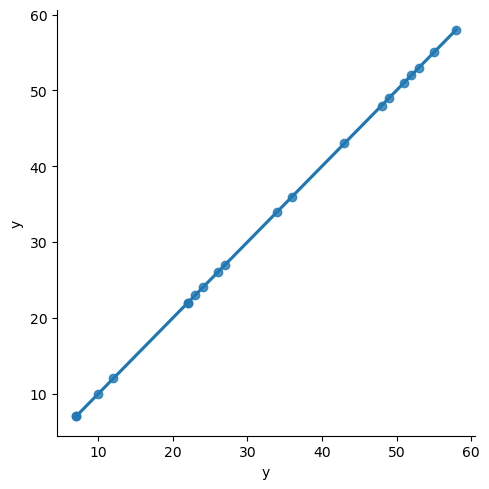

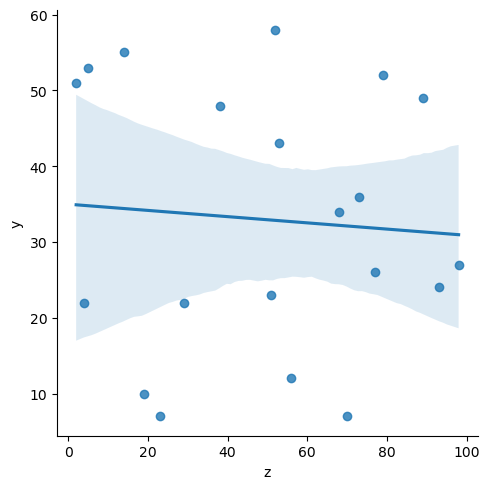

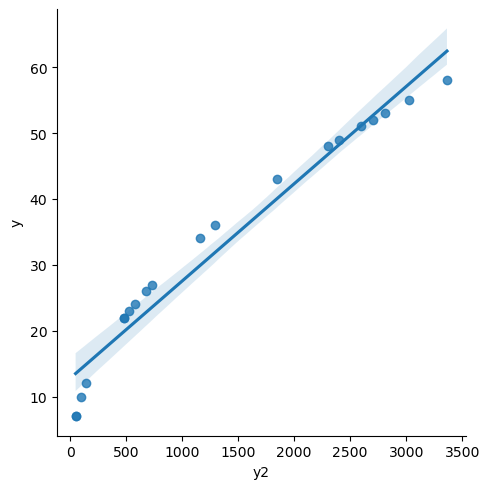

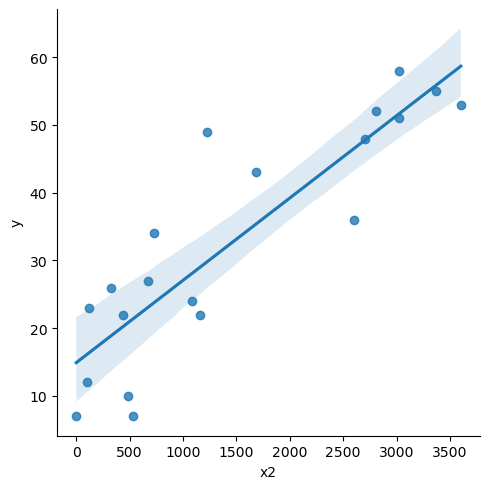

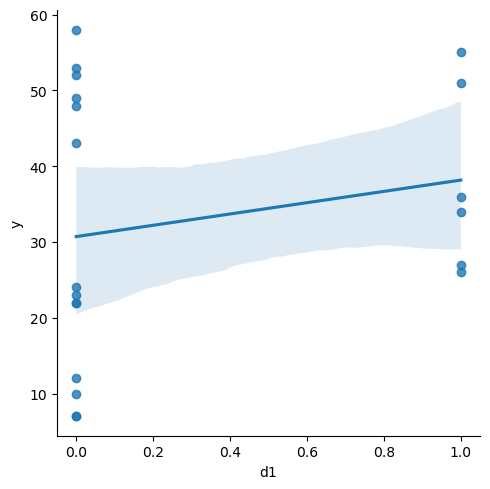

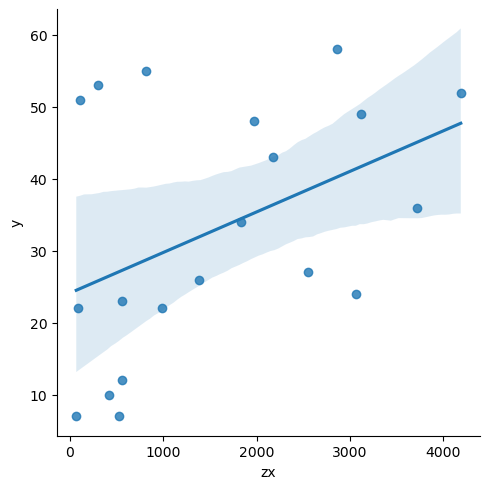

In [190]:
def create_scatter_plots_with_seaborn(dataframe, y_variable):
    #x_variables.remove('cat')
    x_variables = dataframe.columns.tolist()
    categorical_variables = []

    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':
            categorical_variables.append(column)

    x_variables = [x for x in x_variables if x not in categorical_variables]

    for x in x_variables:
        sns.lmplot(x=x,y='y', fit_reg=True, data=df)

create_scatter_plots_with_seaborn(df,y)

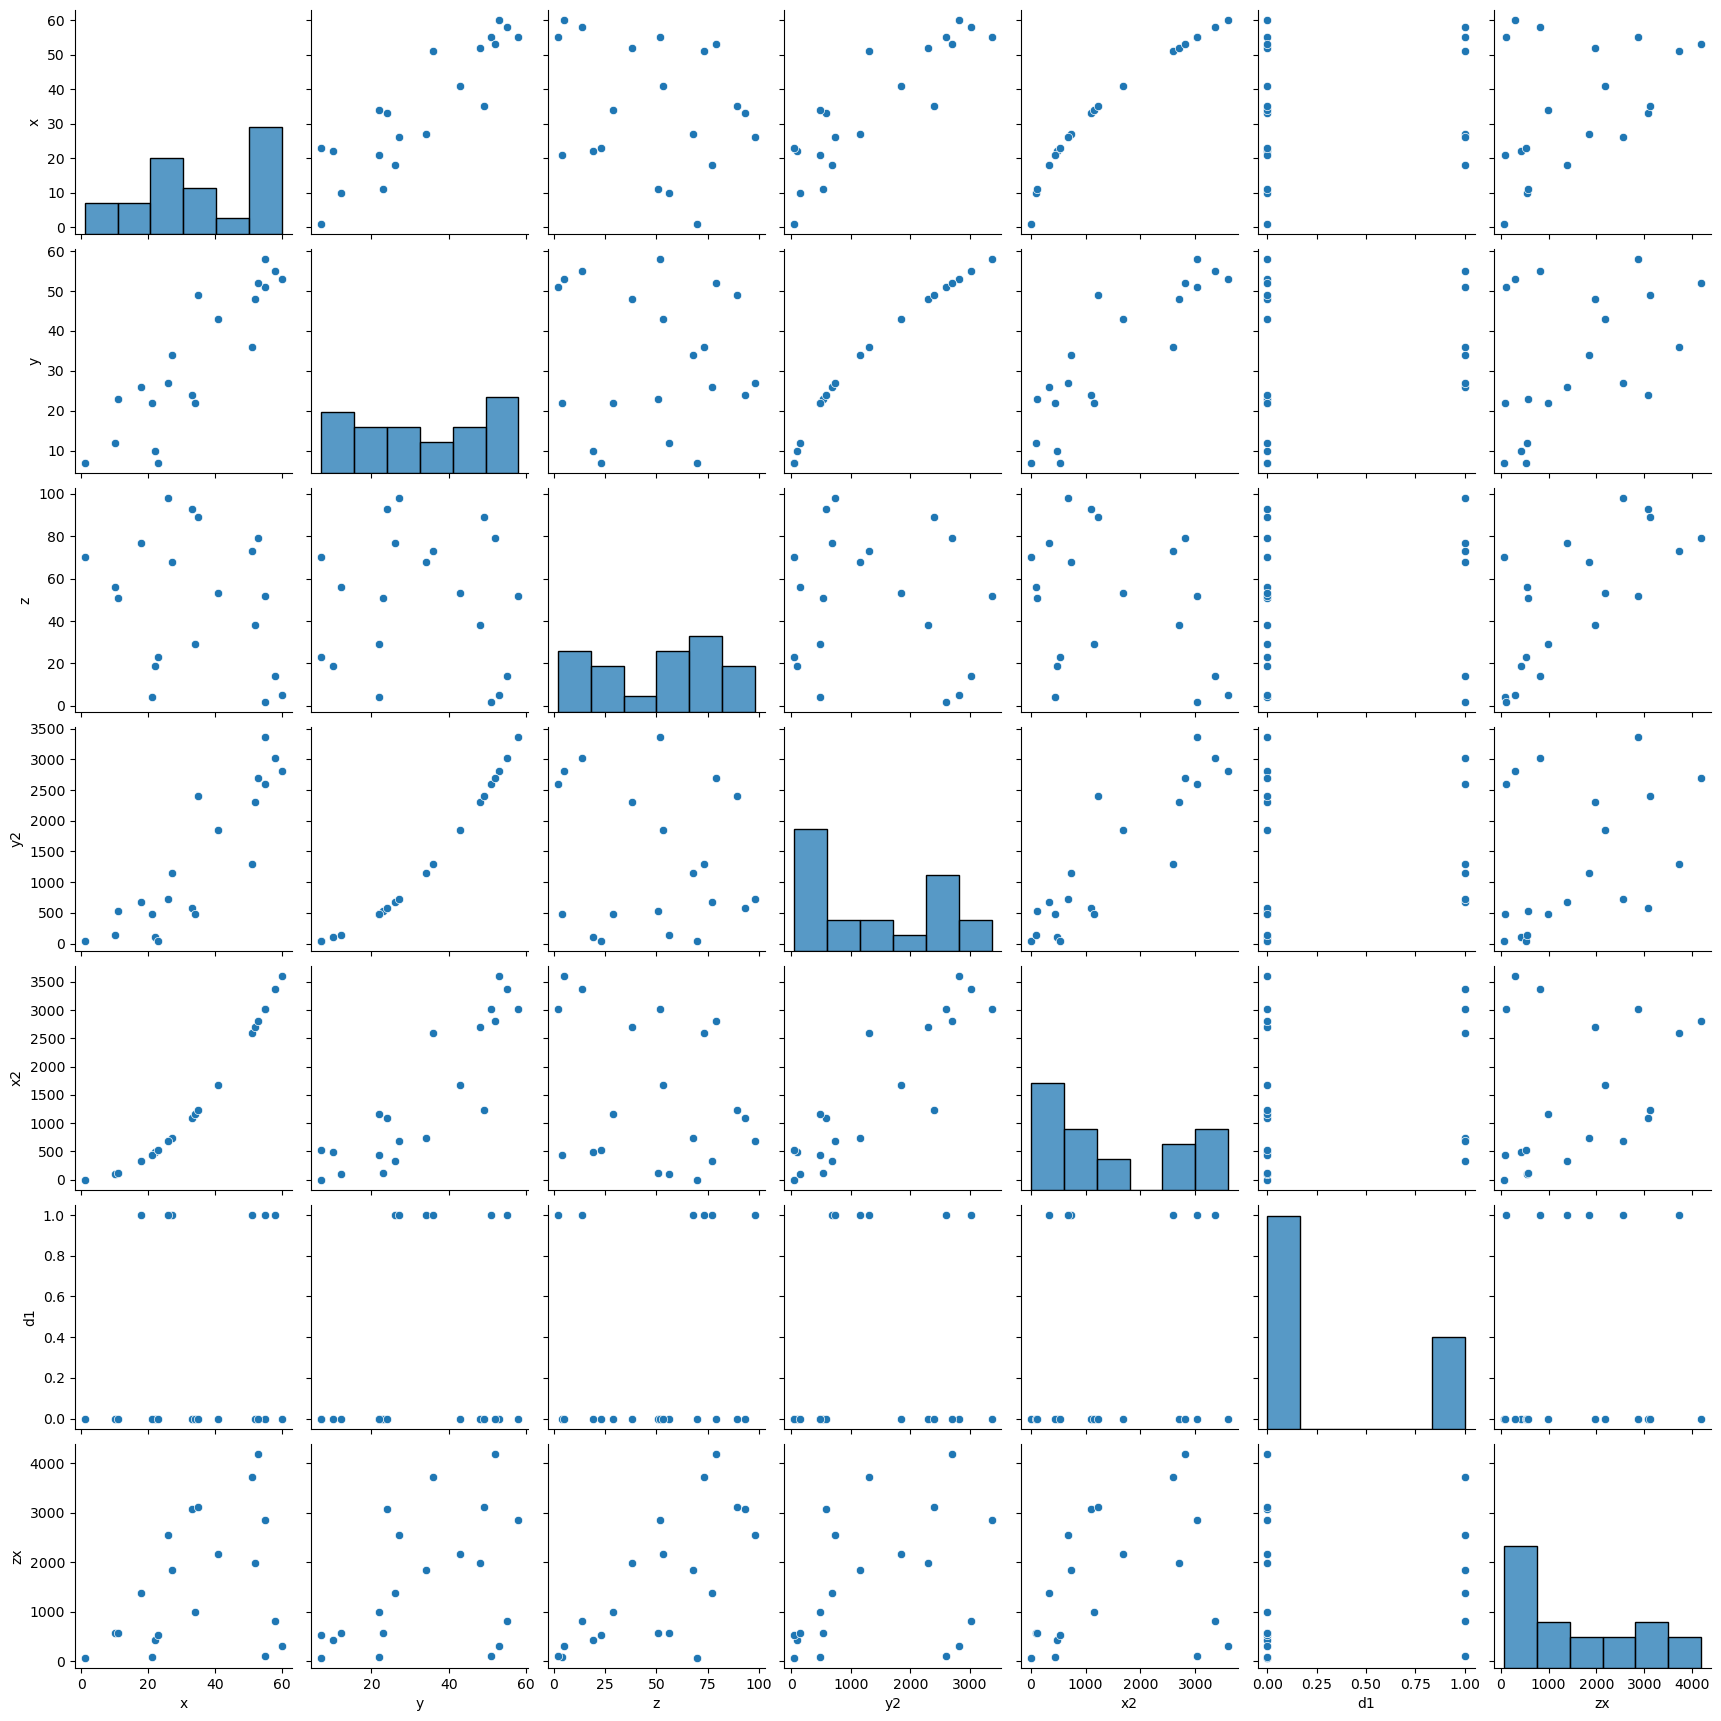

In [191]:
#Plot everything against everything with Seaborn
sns.pairplot(df)

In [11]:
parameters = results.params
print(parameters)
tvalues = results.tvalues
pvalues = results.pvalues

const    5.299929
x        0.416945
z        0.033864
x2      -0.005362
y2       0.014363
dtype: float64


In [198]:
#Gather Regression Statistics and Values
rsquared = results.rsquared
adj_rsquared = results.rsquared_adj
fstat = results.fvalue
aic = results.aic
bic = results.bic

rsquared

0.9738487117223145

In [12]:
ci = results.conf_int(alpha=0.05)
ci

,0,1
const,-0.598515,11.198372
x,0.045523,0.788366
z,-0.019951,0.087680
x2,-0.011523,0.000798
y2,0.011197,0.017529


eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


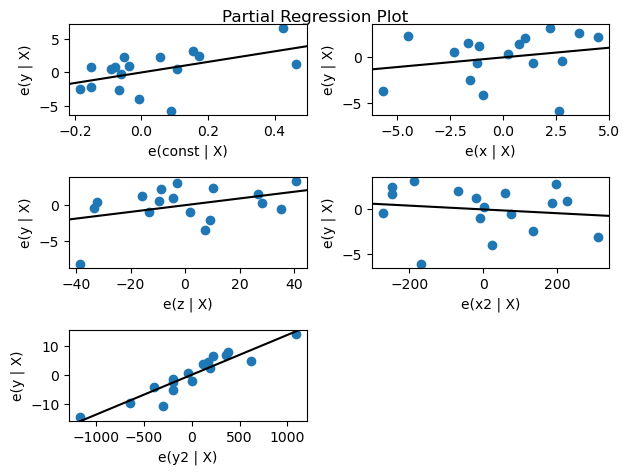

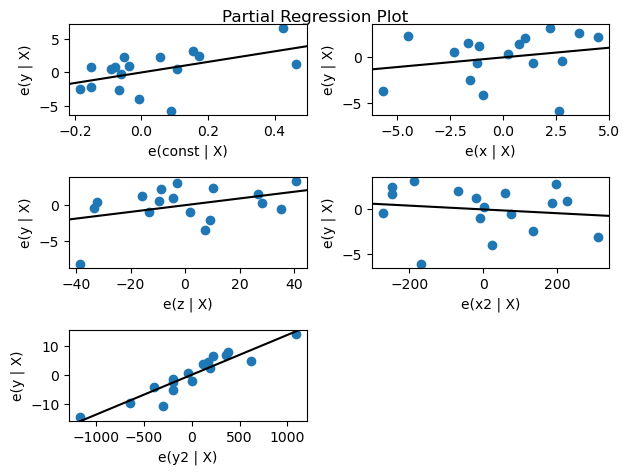

In [207]:
sm.graphics.plot_partregress_grid(results)


In [208]:
#line = results.params[0] + results.params[1]*df['x'] + results.params[2]*df['z']
#plt.scatter(df['y'],yhat)
#plt.plot(line,yhat, color='red')

In [26]:
#Categorical interaction term
model = sm.OLS.from_formula('y ~ x + d1 + x:d1', df)
results = model.fit()
r = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     20.48
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           1.00e-05
Time:                        19:09:47   Log-Likelihood:                -68.983
No. Observations:                  20   AIC:                             146.0
Df Residuals:                      16   BIC:                             149.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5897      4.705      0.338      0.740      -8.384      11.564
x              0.9041      0.128      7.072      0.000       0.633       1.175
d1            12.0186     10.375      1.158      0.264      -9.975      34.012
x:d1          -0.2771      0.253     -1.093      0.290      -0.814       0.260
==============================================================================
Omnibus:                        0.166   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.920   Jarque-Bera (JB):                0.188
Skew:                          -0.167   Prob(JB):                        0.910
Kurtosis:                       2.663   Cond. No.                         232.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [223]:
#Continuous interaction term
model = sm.OLS.from_formula('y ~ x + z + z:x', df)
results = model.fit()
r = model.fit()
results.summary()

/Users/robertwrobel/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     16.13
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           0.000114
Time:                        15:20:00   Log-Likelihood:                -57.520
No. Observations:                  17   AIC:                             123.0
Df Residuals:                      13   BIC:                             126.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.6211     13.972     -1.261      0.229     -47.806      12.564
x              1.2349      0.284      4.354      0.001       0.622       1.848
z              0.3971      0.231      1.717      0.110      -0.103       0.897
z:x           -0.0075      0.005     -1.439      0.174      -0.019       0.004
==============================================================================
Omnibus:                        0.819   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.664   Jarque-Bera (JB):                0.701
Skew:                          -0.154   Prob(JB):                        0.704
Kurtosis:                       2.054   Cond. No.                     1.55e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [224]:
predictions = pd.DataFrame({'x': [1, 1, 1, 1, 1],
                            'z': [1, 1, 0, 0, 1],
                            'x2':[100,200,300,400,500],
                            'y2':[20,20,20,20,20]})

predictions['yhat'] = results.predict(predictions)
print(predictions)

   x  z   x2  y2       yhat
0  1  1  100  20 -15.996620
1  1  1  200  20 -15.996620
2  1  0  300  20 -16.386195
3  1  0  400  20 -16.386195
4  1  1  500  20 -15.996620


Intercept   -17.621054
x             1.234859
z             0.397078
z:x          -0.007504
dtype: float64
Intercept   -17.621054
x             1.234859
z             0.397078
z:x          -0.007504
dtype: float64


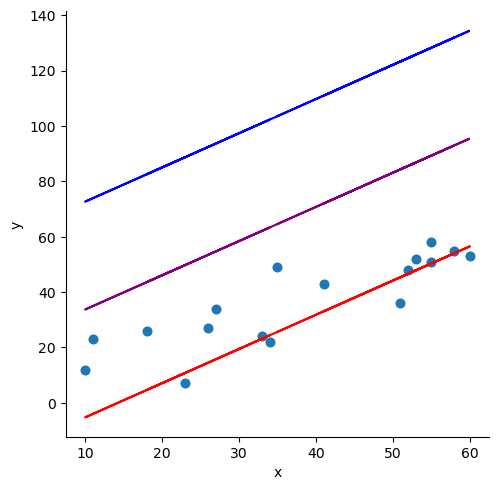

In [225]:
sns.lmplot(x='x',y='y', fit_reg=False, data=df)
r = results
print(results.params)
print(r.params)
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], r.params[0] + r.params[1]*df['x'] + r.params[2] * 0 + r.params[3] * 0, color='red')
plt.plot(df['x'], r.params[0] + r.params[1]*df['x'] + r.params[2] * 100 + r.params[3] * 100, color='purple')
plt.plot(df['x'], r.params[0] + r.params[1]*df['x'] + r.params[2] * 200 + r.params[3] * 200, color='blue')


In [30]:
#Comparing models with other measures

models = ['model1','model2']
r_squared = [model1.rsquared, model2.rsquared] #Larger = better
adj_r_squared = [model1.rsquared_adj, model2.rsquared_adj] #Larger = better
aic = [model1.aic, model2.aic] #Smaller = better
bic = [model1.bic, model2.bic] #Smaller = better

data = {
    'Model': models,
    'R-squared': r_squared,
    'Adjusted R-squared': adj_r_squared,
    'AIC': aic,
    'BIC': bic
}
df_stats = pd.DataFrame(data)

print(df_stats)

    Model  R-squared  Adjusted R-squared         AIC         BIC
0  model1   0.800923            0.777502  143.225359  146.212556
1  model2   0.974503            0.967704  106.122809  111.101470


In [31]:
for_model1 = 0
for_model2 = 0

# Comparison for R-squared
if r_squared[0] > r_squared[1]:
    print("Model 1 has a higher R-squared.")
    for_model1 += 1
elif r_squared[1] > r_squared[0]:
    print("Model 2 has a higher R-squared.")
    for_model2 += 1

else:
    print("R-squared values are equal for both models.")

# Comparison for adjusted R-squared
if adj_r_squared[0] > adj_r_squared[1]:
    print("Model 1 has a higher adjusted R-squared.")
    for_model1 += 1
elif adj_r_squared[1] > adj_r_squared[0]:
    print("Model 2 has a higher adjusted R-squared.")
    for_model2 += 1
else:
    print("Adjusted R-squared values are equal for both models.")

# Comparison for AIC
if aic[0] < aic[1]:
    print("Model 1 has a lower AIC.")
    for_model1 += 1
elif aic[1] < aic[0]:
    print("Model 2 has a lower AIC.")
    for_model2 += 1

else:
    print("AIC values are equal for both models.")

# Comparison for BIC
if bic[0] < bic[1]:
    print("Model 1 has a lower BIC.")
    for_model1 += 1
elif bic[1] < bic[0]:
    print("Model 2 has a lower BIC.")
    for_model2 += 1

else:
    print("BIC values are equal for both models.")
    
if for_model1 > for_model2:
    print('Based on all for selection criteria, Model1 is a better fit')
elif for_model1 < for_model2:
    print('Based on all for selection criteria, Model2 is a better fit')
else:
    print('Based on all four selection criteria, Model1 and Model2 fit the data equally well')

Model 2 has a higher R-squared.
Model 2 has a higher adjusted R-squared.
Model 2 has a lower AIC.
Model 2 has a lower BIC.
Based on all for selection criteria, Model2 is a better fit


In [ ]:
#Stepwise Variable Selection - Forward
from itertools import combinations


#Define the feature matrix X and target variable y
X = data[['x', 'z', 'x2','y2']]  # Replace with the appropriate column names
y = data['y']  # Replace with the appropriate column name

#Perform forward stepwise variable selection
def forward_stepwise_selection(X, y, max_features=None):
    selected_features = []
    remaining_features = set(X.columns)
    
    if max_features is None:
        max_features = len(X.columns)
    
    while len(remaining_features) > 0 and len(selected_features) < max_features:
        best_pvalue = float('inf')
        best_feature = None
        
        for feature in remaining_features:
            if X[feature].dtype == 'object':
                continue
            
            model_formula = f"{feature} ~ {' + '.join(selected_features + [feature])}"
            model = sm.OLS.from_formula(model_formula, data=X.join(y)).fit()
            pvalue = model.pvalues[feature]
            
            if pvalue < best_pvalue:
                best_pvalue = pvalue
                best_feature = feature
        
        if best_feature is not None:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break
    print(selected_features)
    



In [ ]:
forward_stepwise_selection(X, y, 2)

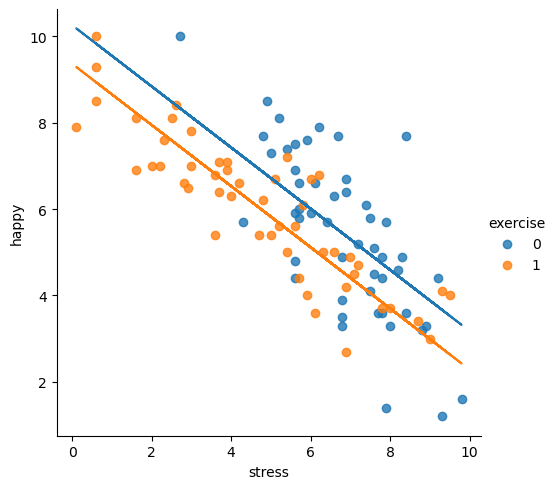

In [136]:
data = pd.read_csv('mood.csv')
#Categorical variable
model = sm.OLS.from_formula('happy ~ stress + exercise', data=data).fit()

stress = data.stress
exercise = data.exercise

b0 = model.params[0]
b1 = model.params[1]
b2 = model.params[2]

happy_wo_ex = b0 + (b1 * stress) + (b2 * 0)
happy_wi_ex = b0 + (b1 * stress) + (b2 * 1) 

sns.lmplot(x='stress', y='happy', hue='exercise', fit_reg=False, data=data)
plt.plot(stress, happy_wo_ex)
plt.plot(stress, happy_wi_ex)

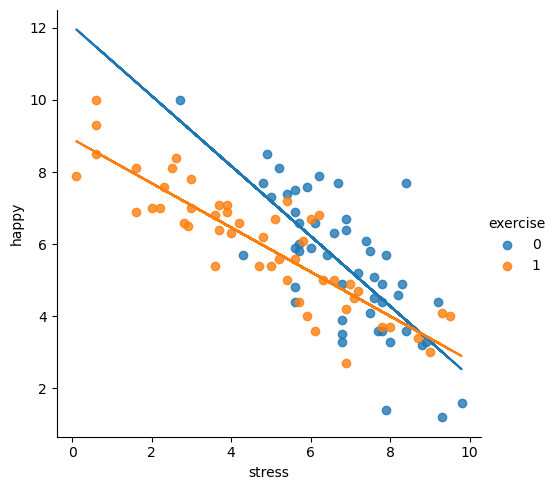

In [138]:
#Categorical interaction term
model = sm.OLS.from_formula('happy ~ stress + exercise + stress:exercise', data=data).fit()
stress = data.stress
exercise = data.exercise

b0 = model.params[0] #intercept
b1 = model.params[1] #stress
b2 = model.params[2] #exercise
b3 = model.params[3] #stress * exercise (interaction)

happy_wo_ex = b0 + (b1 * stress) + (b2 * 0)
happy_w_ex = b0 + (b1 * stress) + (b2 * 1) + (b3 * stress * 1)

sns.lmplot(x='stress', y='happy', hue='exercise', fit_reg=False, data=data)
plt.plot(stress, happy_wo_ex)
plt.plot(stress, happy_w_ex)

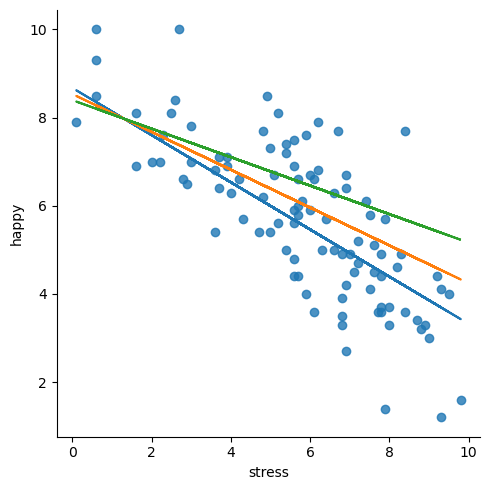

In [141]:
#Continuous interaction term
model = sm.OLS.from_formula('happy ~ stress + sleep + stress:sleep', data=data).fit()
stress = data.stress
exercise = data.exercise
sleep = data.sleep

b0 = model.params[0]
b1 = model.params[1]
b2 = model.params[2]
b3 = model.params[3]

happy_sleep6 = b0 + (b1 * stress) + (b2 * 6) + (b3 * stress * 6)
happy_sleep9 = b0 + (b1 * stress) + (b2 * 9) + (b3 * stress * 9)
happy_sleep12 = b0 + (b1 * stress) + (b2 * 12) + (b3 * stress * 12)

sns.lmplot(x='stress', y='happy', fit_reg=False, data=data)
plt.plot(stress, happy_sleep6)
plt.plot(stress, happy_sleep9)
plt.plot(stress, happy_sleep12)

In [40]:
#Comparing Models with Cross Validation
data = pd.read_csv('simple_regression.csv')  # Replace 'your_data.csv' with the actual file path

#Define the feature matrix X and target variable y
X = data[['x', 'z', 'x2']]  # Replace with the appropriate column names
y = data['y']  # Replace with the appropriate column name

#Define the models to compare and store in a tuple of name / type pairs
models = [
    ('Model 1', sm.OLS.from_formula('y ~ x + z', data)),  
    ('Model 2', sm.OLS.from_formula('y ~ x + z + x2', data))] 

#Perform cross-validation and compare models
k = 5
n = len(X)
fold_size = n // k

for model_name, model_type in models:
    rmse_scores = []

    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size

        #Split the data into training and testing sets
        X_train = pd.concat([X[:start], X[end:]])
        y_train = pd.concat([y[:start], y[end:]])
        X_test = X[start:end]
        y_test = y[start:end]

        #Create the model
        model = model_type

        #Fit the model to the training data
        results = model.fit()

        #Predict using the testing set
        y_pred = results.predict(X_test)

        #Calculate the root mean squared error
        rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
        rmse_scores.append(rmse)

    #Calculate the average root mean squared error across all folds for the current model
    average_rmse = np.mean(rmse_scores)

    #Print the model name and average RMSE
    print(f"{model_name}: Average RMSE = {average_rmse:.2f}")

FileNotFoundError: [Errno 2] No such file or directory: 'simple_regression.csv'